In [ ]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("ds4.csv")
heart_disease = pd.DataFrame(data)
print(heart_disease)


    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

In [ ]:
model = BayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])

In [ ]:
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

HeartDisease_infer = VariableElimination(model)

print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})

print(q)


For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4
For Gender enter Male:0, Female:1
For Family History enter Yes:1, No:0
For Diet enter High:0, Medium:1
for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3
for Cholesterol enter High:0, BorderLine:1, Normal:2
Enter Age: 3
Enter Gender: 0
Enter Family History: 0
Enter Diet: 1
Enter Lifestyle: 2
Enter Cholestrol: 2
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


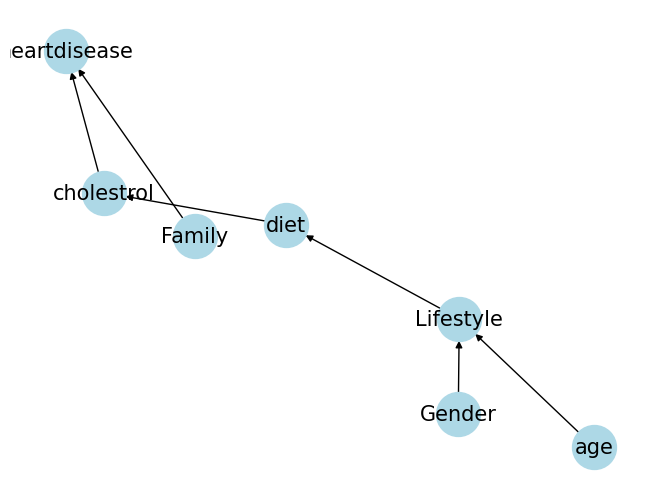

In [ ]:
G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=15)
plt.show()